<a href="https://colab.research.google.com/github/chandrasekhark/PythonforDataScience/blob/main/FMCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv(r'/content/Project_Data_1.csv', index_col=0, thousands  = ',')

In [ ]:
df.index.names = ['country']
df.columns.names = ['year']
df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [ ]:
df.shape

(207, 18)

In [ ]:
df.isna().sum()

year
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64

In [ ]:
df.describe()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,196.966184,196.468599,192.811594,191.173913,188.724638,187.942029,178.898551,180.975845,178.120773,180.473430,177.521739,177.797101,179.516908,176.405797,173.922705,171.183575,169.019324,167.256039
std,232.385067,229.329664,224.805522,220.093799,216.750218,212.477587,193.786752,192.272421,188.843079,195.062942,199.438504,205.102644,205.321624,210.272545,210.486938,211.218437,211.057714,212.246576
min,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,40.000000,37.500000,37.000000,34.000000,32.500000,31.500000,29.500000,29.000000,28.000000,21.500000,22.500000,24.500000,20.500000,21.000000,19.500000,18.000000,19.000000
50%,96.000000,93.000000,91.000000,88.000000,89.000000,92.000000,88.000000,93.000000,90.000000,90.000000,85.000000,80.000000,79.000000,71.000000,71.000000,66.000000,65.000000,65.000000
75%,290.000000,315.500000,320.000000,316.500000,314.000000,310.500000,306.500000,320.500000,323.000000,345.500000,319.500000,309.000000,306.000000,297.500000,287.500000,282.500000,277.500000,278.000000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.000000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000


In [ ]:
df.nunique()

year
1990    153
1991    157
1992    156
1993    149
1994    154
1995    155
1996    149
1997    146
1998    155
1999    146
2000    145
2001    147
2002    144
2003    147
2004    139
2005    137
2006    139
2007    135
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1990    207 non-null    int64
 1   1991    207 non-null    int64
 2   1992    207 non-null    int64
 3   1993    207 non-null    int64
 4   1994    207 non-null    int64
 5   1995    207 non-null    int64
 6   1996    207 non-null    int64
 7   1997    207 non-null    int64
 8   1998    207 non-null    int64
 9   1999    207 non-null    int64
 10  2000    207 non-null    int64
 11  2001    207 non-null    int64
 12  2002    207 non-null    int64
 13  2003    207 non-null    int64
 14  2004    207 non-null    int64
 15  2005    207 non-null    int64
 16  2006    207 non-null    int64
 17  2007    207 non-null    int64
dtypes: int64(18)
memory usage: 30.7+ KB


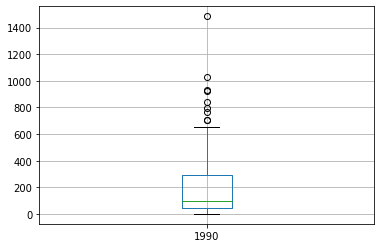

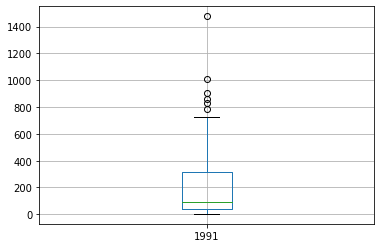

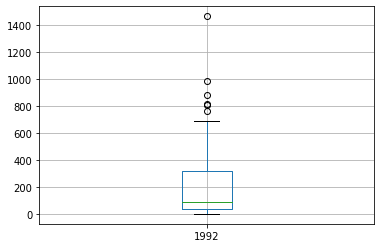

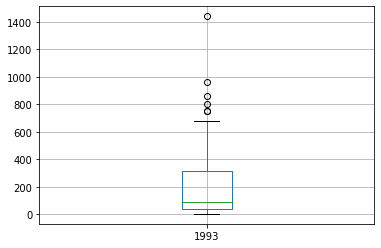

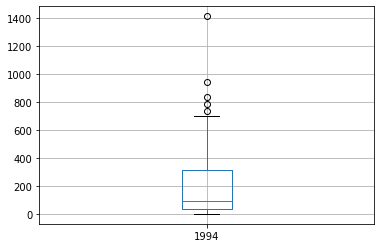

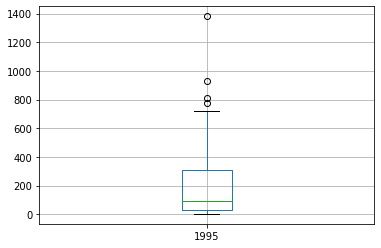

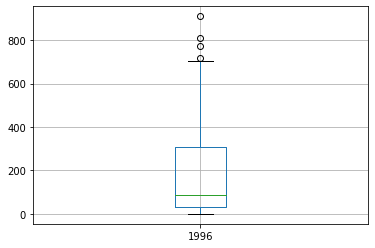

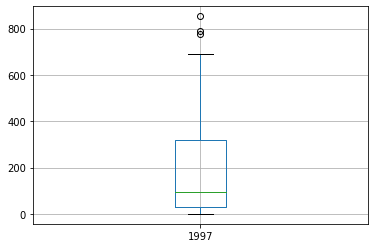

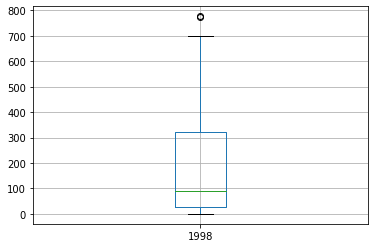

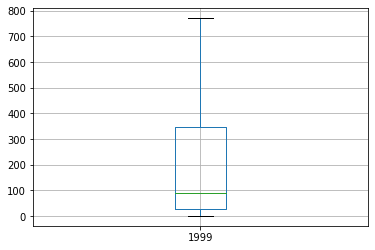

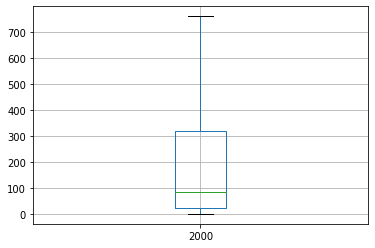

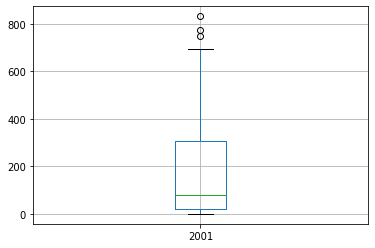

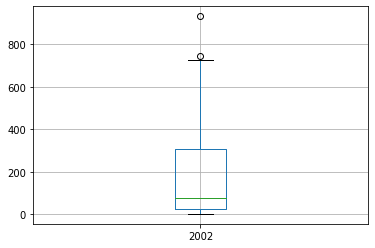

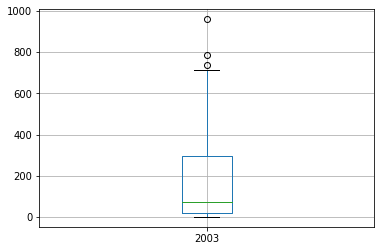

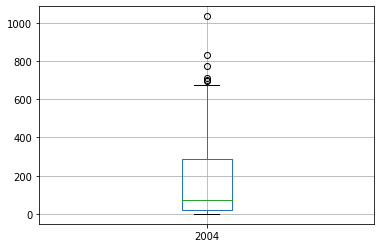

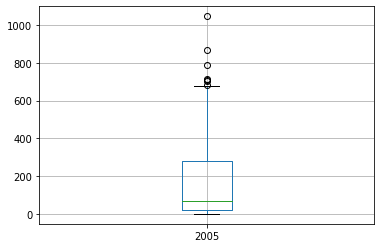

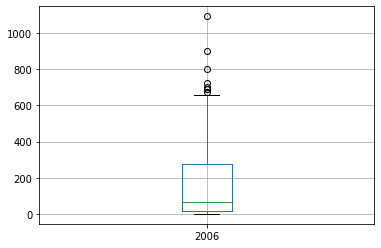

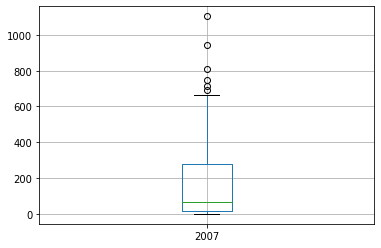

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# subplots, 
df1 = df.select_dtypes(include=numerics)
for column in df1.columns.tolist():
    plt.figure()
    df.boxplot([column])

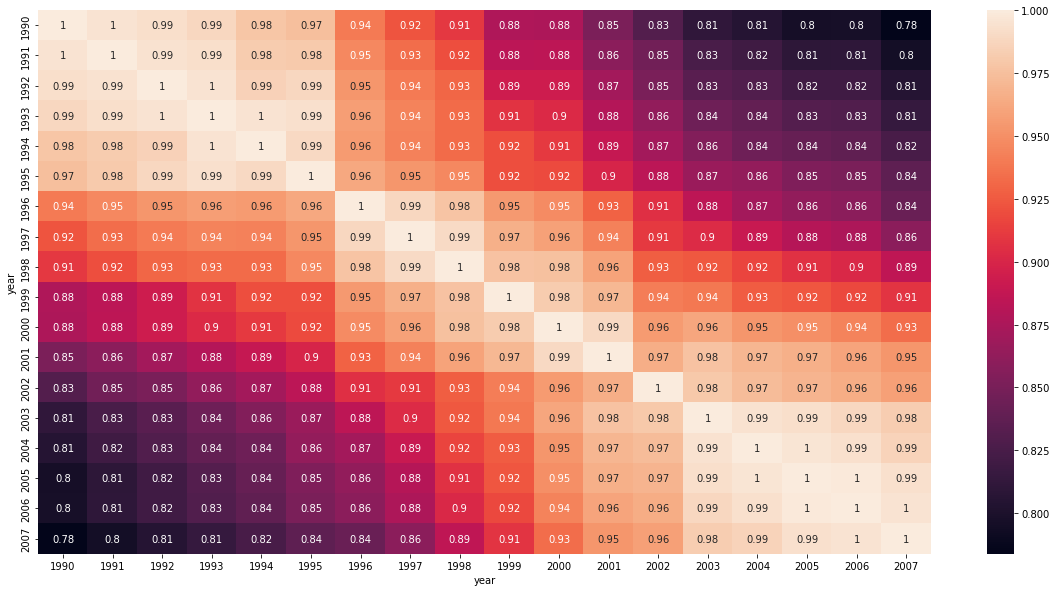

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr().abs(), annot = True)

Which algorithm should be applied here?

Principal Components Analysis is the best algorithm.

In [ ]:
#apply PCA first
pca = PCA(n_components=2)
pca_data = pca.fit(df).transform(df)

In [ ]:
X = pd.DataFrame(pca_data, columns=['PCA1','PCA2'])
X.index = df.index
X.head()

,PCA1,PCA2
country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


In [ ]:
print('PCA Variance and ratio:', pca.explained_variance_,pca.explained_variance_ratio_)

PCA Variance and ratio: [727732.11575889  48000.35713839] [0.91808789 0.060556  ]


In [ ]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters = i)
  km.fit(X) # unsupervised learning 
  wcss.append(km.inertia_)

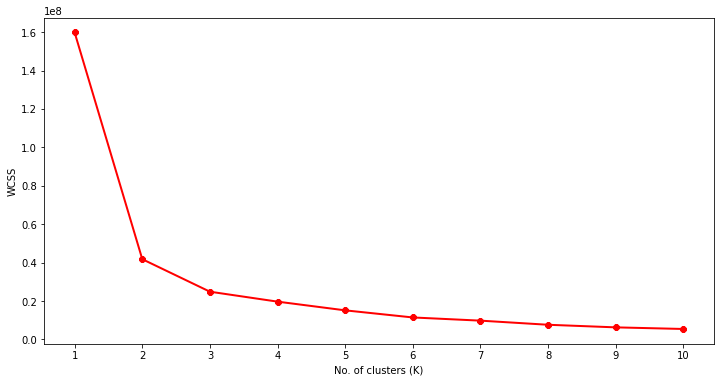

In [ ]:
# the elbow curve 

plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("No. of clusters (K)")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
# number of clusters = 3
#call
km1 = KMeans(n_clusters = 3)
#fit
km1.fit(X)

#predict
y = km1.predict(X)


print(y)

[0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 0 1 0 1 1 1 1 0 0 2 1 1 0 1
 0 0 1 0 1 1 0 1 1 1 1 1 1 0 2 0 1 2 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 2 1 1 0 1 1 0 0 1 1 1 0 0 1 1
 2 1 2 1 1 1 1 0 1 1 0 0 2 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 2 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 0 1 2 1 1 1 0 0 2 1 1 0 1 2 1 1 1 1 0 1 2 2 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0]


In [ ]:
#cluster centers
print(km1.cluster_centers_)

[[ 818.40566987  -80.66376278]
 [-515.89907824   13.52152289]
 [1988.84290863  132.91583826]]


In [ ]:
#adding cluster column
df1 = X
df1['label'] = y
df1.head()

,PCA1,PCA2,label
country,,,
Afghanistan,732.215864,203.381494,0
Albania,-613.296510,4.715978,1
Algeria,-569.303713,-36.837051,1
American Samoa,-717.082766,5.464696,1
Andorra,-661.802241,11.037736,1


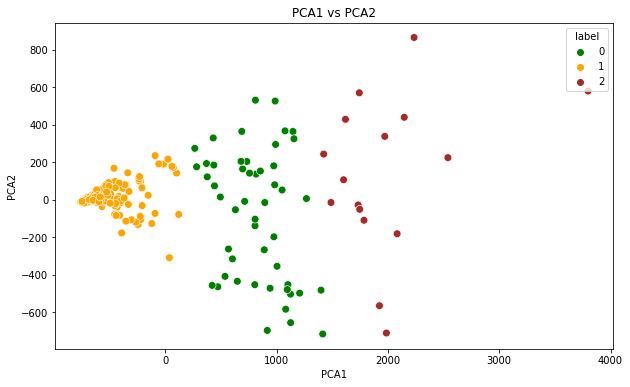

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'PCA1',y = 'PCA2',hue="label",  
                 palette=['green','orange','brown'], legend='full',data = df1  ,s = 60 )
plt.xlabel('PCA1')
plt.ylabel('PCA2') 
plt.title('PCA1 vs PCA2')
plt.show()

In [ ]:
#adding label column to the original data
df['label']=y

In [ ]:
df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,label
country,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,0
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,1
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,1
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,1
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,1


In [ ]:
#Largest importer and constantly increasing
df['total'] = df.sum(axis=1)
df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,label,total
country,,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,0,6360
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,1,666
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,1,854
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,1,222
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,1,456


In [ ]:
df.sort_values(by='total', ascending=False).nlargest(10, 'total')

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,label,total
country,,,,,,,,,,,,,,,,,,,,
Djibouti,1485,1477,1463,1442,1414,1381,720,669,698,701,761,775,932,960,1034,1046,1093,1104,2,19157
Cambodia,928,905,881,858,836,811,810,789,777,764,758,750,728,712,696,676,672,664,2,14017
Kiribati,1026,1006,986,966,947,928,910,853,571,556,546,607,587,477,439,419,405,423,2,12654
"Korea, Dem. Rep.",841,828,815,802,788,775,775,775,775,770,713,650,577,527,499,508,500,441,2,12361
Togo,702,687,668,647,628,614,613,658,637,647,656,669,701,693,702,713,726,750,2,12113
Sierra Leone,465,479,492,504,517,534,525,565,602,636,675,696,743,784,830,866,902,941,2,11758
Philippines,799,783,766,750,735,719,705,689,669,649,600,578,561,542,534,520,505,500,2,11606
Swaziland,629,590,527,477,448,441,460,504,556,647,740,832,693,739,776,788,801,812,2,11462
South Africa,769,726,676,620,562,502,480,466,465,426,515,581,586,649,676,707,690,692,2,10790


**Sierra Leone is the country has constantly increasing the imports and high total.**

Total - 11757

In [ ]:
label_2 = df.loc[df['label']==2]
label_2

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,label,total
country,,,,,,,,,,,,,,,,,,,,
Bangladesh,639,623,608,594,579,576,550,535,516,492,500,491,478,458,444,416,392,387,2,9280
Bhutan,924,862,804,750,699,651,620,597,551,538,515,512,472,460,443,412,406,363,2,10581
Cambodia,928,905,881,858,836,811,810,789,777,764,758,750,728,712,696,676,672,664,2,14017
"Korea, Dem. Rep.",841,828,815,802,788,775,775,775,775,770,713,650,577,527,499,508,500,441,2,12361
Djibouti,1485,1477,1463,1442,1414,1381,720,669,698,701,761,775,932,960,1034,1046,1093,1104,2,19157
Kiribati,1026,1006,986,966,947,928,910,853,571,556,546,607,587,477,439,419,405,423,2,12654
Mali,640,631,621,609,597,583,573,566,565,567,571,573,572,578,584,589,593,599,2,10613
Mauritania,585,587,590,592,594,595,622,615,612,615,619,624,632,642,494,565,556,559,2,10700
Namibia,650,685,687,683,671,658,387,395,411,442,481,506,544,560,572,570,556,532,2,9992


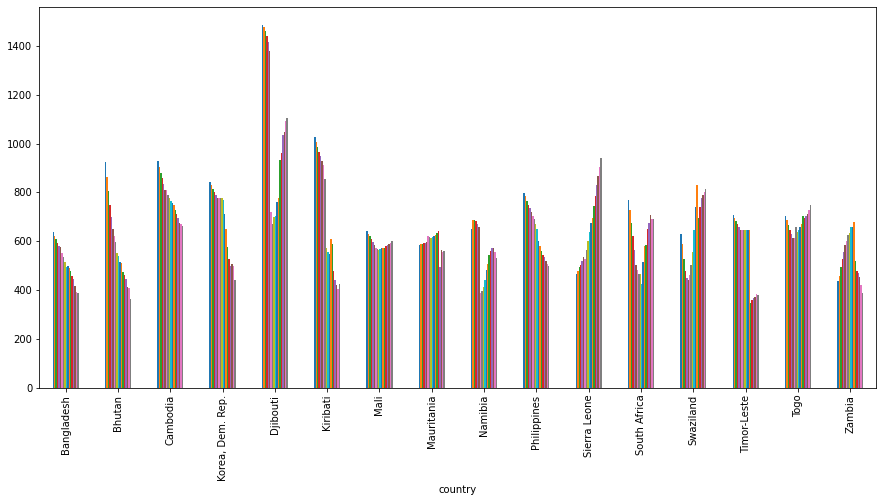

In [ ]:
label_2.loc[:,'1990':'2007'].plot(kind='bar', legend=False, figsize=(15,7))

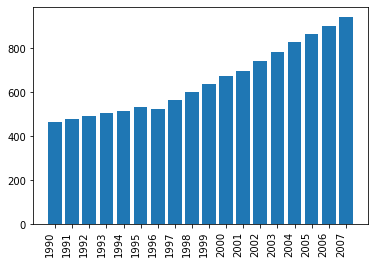

In [ ]:
X = df.loc['Sierra Leone'].index[0:18]
Y = df.loc['Sierra Leone'].values[0:18]

plt.bar(X,Y)
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

#Which are largest importers and constantly increasing
**Sierra Leone**

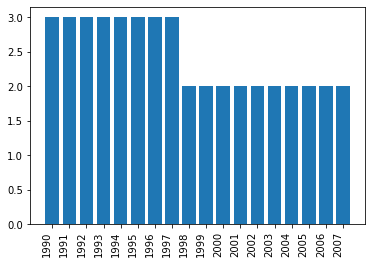

In [ ]:
#Most consistent
X = df.loc['Monaco'].index[0:18]
Y = df.loc['Monaco'].values[0:18]

plt.bar(X,Y)
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()